In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [2]:
games = pd.read_csv('data/games.csv')
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [3]:
players = pd.read_csv('data/players.csv')
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [4]:
plays = pd.read_csv('data/plays.csv')
pd.set_option('display.max_columns', None)
plays[(plays.playId==3126) & (plays.ballCarrierId == 52457)]




,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN


In [5]:
tackles = pd.read_csv('data/tackles.csv')
tackles

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [6]:
tracking_week_1 = pd.read_csv('data/tracking_week_1.csv')
tracking_week_2 = pd.read_csv('data/tracking_week_2.csv')
tracking_week_3 = pd.read_csv('data/tracking_week_3.csv')
tracking_week_4 = pd.read_csv('data/tracking_week_4.csv')
tracking_week_5 = pd.read_csv('data/tracking_week_5.csv')
tracking_week_6 = pd.read_csv('data/tracking_week_6.csv')
tracking_week_7 = pd.read_csv('data/tracking_week_7.csv')
tracking_week_8 = pd.read_csv('data/tracking_week_8.csv')
tracking_week_9 = pd.read_csv('data/tracking_week_9.csv')


In [7]:
print(f"There are {tracking_week_1.playId.nunique()} unique plays in tracking week 1" )

There are 1247 unique plays in tracking week 1


In [8]:
tracking_week_1[(tracking_week_1.playId == 56) & (tracking_week_1.gameId == 2022090800) & ((tracking_week_1.displayName == 'football') | (tracking_week_1.displayName == 'Stefon Diggs'))]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
88,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.200000,14.0,BUF,left,80.600000,38.290000,6.230000,0.900000,0.62,140.05,189.38,NaN
89,2022090800,56,42489.0,Stefon Diggs,2,2022-09-08 20:24:05.299999,14.0,BUF,left,80.480000,37.680000,6.240000,1.270000,0.62,134.22,191.08,pass_arrived
90,2022090800,56,42489.0,Stefon Diggs,3,2022-09-08 20:24:05.400000,14.0,BUF,left,80.340000,37.090000,5.980000,2.480000,0.60,127.16,194.40,NaN
91,2022090800,56,42489.0,Stefon Diggs,4,2022-09-08 20:24:05.500000,14.0,BUF,left,80.190000,36.530000,5.670000,3.370000,0.58,120.72,196.97,NaN
92,2022090800,56,42489.0,Stefon Diggs,5,2022-09-08 20:24:05.599999,14.0,BUF,left,80.010000,36.000000,5.430000,3.650000,0.56,118.07,199.54,NaN
93,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.850000,35.590000,4.610000,4.820000,0.45,114.27,202.20,pass_outcome_caught
94,2022090800,56,42489.0,Stefon Diggs,7,2022-09-08 20:24:05.799999,14.0,BUF,left,79.690000,35.200000,4.010000,5.100000,0.41,111.79,204.77,NaN
95,2022090800,56,42489.0,Stefon Diggs,8,2022-09-08 20:24:05.900000,14.0,BUF,left,79.540000,34.880000,3.440000,5.200000,0.36,107.29,206.99,NaN
96,2022090800,56,42489.0,Stefon Diggs,9,2022-09-08 20:24:06.000000,14.0,BUF,left,79.410000,34.610000,2.830000,5.170000,0.30,108.46,208.55,NaN
97,2022090800,56,42489.0,Stefon Diggs,10,2022-09-08 20:24:06.099999,14.0,BUF,left,79.310000,34.400000,2.190000,5.280000,0.23,104.58,207.99,NaN


In [9]:
print(tracking_week_1[(tracking_week_1.playId == 56) & (tracking_week_1.gameId == 2022090800) & (tracking_week_1.displayName == 'football') & (tracking_week_1.frameId == 1)]['x'].values[0])
print(tracking_week_1[(tracking_week_1.playId == 56) & (tracking_week_1.gameId == 2022090800) & (tracking_week_1.displayName == 'football') & (tracking_week_1.frameId == 22)]['x'].values[0])

85.0500030517578
78.2900009155273


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Filter the DataFrame for play number 56 in tracking_week_1
#play_number = 3126
play_number = 80
#game_number = 2022091103
game_number = 2022090800
play_data_tracking = tracking_week_1[(tracking_week_1['playId'] == play_number) & (tracking_week_1['gameId'] == game_number)]

# Define football field dimensions
field_length = 120  # Yards
field_width = 53.3  # Yards

#Extract the row for specific play
specific_play = plays[(plays['gameId'] == game_number) & (plays['playId'] == play_number)]

# Extract the 'ballCarrierId' for the specified play
ball_carrier_id = specific_play['ballCarrierId'].values[0]

#Extract the line of scrimmage and 1st down line from specified play
if play_data_tracking['playDirection'].iloc[0] == 'Right':
    los_id = specific_play['yardlineNumber'].values[0]
    first_down_id = los_id + specific_play['yardsToGo'].values[0]
else:
    los_id = abs(110-(specific_play['yardlineNumber'].values[0]))
    first_down_id = (los_id - specific_play['yardsToGo'].values[0])



# Extract the playDescription
play_description = plays[(plays['gameId'] == game_number) & (plays['playId'] == play_number)]['playDescription'].values[0]



In [15]:
specific_play

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN


In [23]:
print(los_id)
print(first_down_id)

86
24


Color Mappings for each team from :

https://teamcolorcodes.com/nfl-team-color-codes/

https://www.schemecolor.com/american-football.php

In [18]:
colors = {
    'ARI':"#97233F", 
    'ATL':"#A71930", 
    'BAL':'#241773', 
    'BUF':"#00338D", 
    'CAR':"#0085CA", 
    'CHI':"#C83803", 
    'CIN':"#FB4F14", 
    'CLE':"#311D00", 
    'DAL':'#003594',
    'DEN':"#FB4F14", 
    'DET':"#0076B6", 
    'GB':"#203731", 
    'HOU':"#03202F", 
    'IND':"#002C5F", 
    'JAX':"#9F792C", 
    'KC':"#E31837", 
    'LA':"#003594", 
    'LAC':"#0080C6", 
    'LV':"#000000",
    'MIA':"#008E97", 
    'MIN':"#4F2683", 
    'NE':"#002244", 
    'NO':"#D3BC8D", 
    'NYG':"#0B2265", 
    'NYJ':"#125740", 
    'PHI':"#004C54", 
    'PIT':"#FFB612", 
    'SEA':"#69BE28", 
    'SF':"#AA0000",
    'TB':'#D50A0A', 
    'TEN':"#4B92DB", 
    'WAS':"#5A1414", 
    'football':'#CBB67C'
}

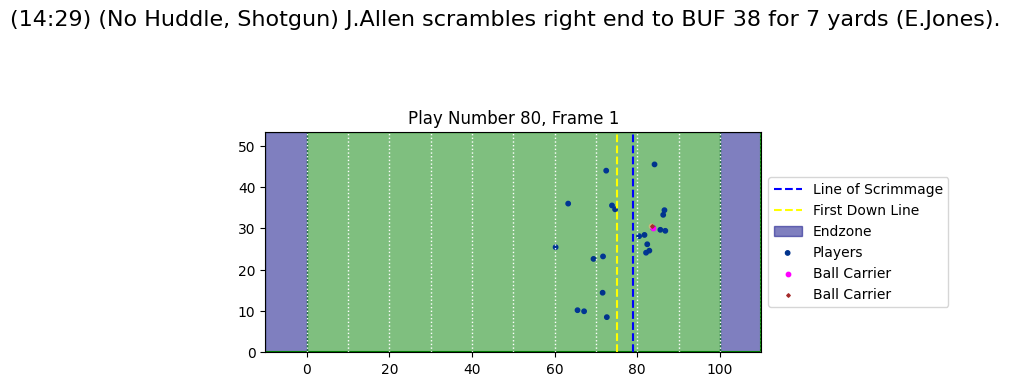

In [49]:
# Create a function to update the animation frames
def update(frame):
    
    plt.clf()
    ax = plt.gca()
    
    # Plot the field
    ax.plot([-10, -10, 110, 110, -10], [0, 53.3, 53.3, 0, 0], color='green')
    # Add yard lines
    for yard_line in range(0, int(50) + 10, 10):
        ax.axvline(x=yard_line, color='white', linestyle='dotted', linewidth=1)

    for yard_line in range(60, int(110) + 10, 10):
        ax.axvline(x=yard_line, color='white', linestyle='dotted', linewidth=1)
        
    # Plot the line of scrimmage (blue) and the first down line (yellow)
    ax.axvline(x=los_id, color='blue', linestyle='--', label='Line of Scrimmage')
    ax.axvline(x=first_down_id, color='yellow', linestyle='--', label='First Down Line')
  
    
    # Set the endzones' colors using the new field size
    ax.fill_between([-10, 0], 0, field_width, color='navy', alpha=0.5, label='Endzone')
    ax.fill_between([100, 120], 0, field_width, color='navy', alpha=0.5)
    ax.fill_between([0, 100], 0, field_width, color='green', alpha=0.5)
    
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-10, 110)
    ax.set_ylim(0, field_width)
    
    frame_data = play_data_tracking[play_data_tracking['frameId'] == frame]
    
    
    # Map the 'club' values to colors for each player
    player_colors = [colors.get(club, 'gray') for club in frame_data['club']]
    
    # Increase marker size (e.g., size 100) and display jerseyNumber
    ax.scatter(frame_data['x'], frame_data['y'], label='Players', c=player_colors, s=10)
    
    
    
    # Create the frame title
    title = f'Play Number {play_number}, Frame {frame}'
    
    # Check if 'event' title is not NaN and add it to the frame title
    event_title = frame_data['event'].values[0]
    if not pd.isna(event_title):
        title += f', Event: {event_title}'
    
    ax.set_title(title)

    # Set the animation title to the playDescription
    plt.gcf().suptitle(play_description, fontsize=16)

    # Highlight the ball carrier's scatter point in red and football in brown
    ball_carrier_data = frame_data[frame_data['nflId'] == ball_carrier_id]
    football_data = frame_data[frame_data['displayName'] == 'football']
    
    ax.scatter(ball_carrier_data['x'], ball_carrier_data['y'], color='magenta', s=10, label='Ball Carrier')
    ax.scatter(football_data['x'], football_data['y'], color='brown', s=3, marker = 'D', label='Ball Carrier')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create the animation
frames = play_data_tracking['frameId'].unique()
ani = FuncAnimation(plt.gcf(), update, frames=frames, repeat=False)



# Display the animation within the Jupyter Notebook or an HTML viewer
HTML(ani.to_jshtml())



Lets try and decipher what 'first_contact' means in this contact

In [44]:
tracking_week_1['event'].unique()

array([nan, 'pass_arrived', 'pass_outcome_caught', 'tackle', 'run',
       'first_contact', 'ball_snap', 'handoff', 'touchdown',
       'out_of_bounds', 'man_in_motion', 'fumble', 'play_action',
       'pass_forward', 'lateral', 'autoevent_passforward',
       'autoevent_passinterrupted', 'line_set', 'qb_slide', 'shift',
       'run_pass_option', 'qb_sack', 'pass_shovel', 'autoevent_ballsnap',
       'snap_direct', 'fumble_defense_recovered',
       'fumble_offense_recovered'], dtype=object)

In [46]:
tracking_week_1[tracking_week_1.event == 'first_contact'].head(1)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
525,2022090800,80,35472.0,Rodger Saffold,20,2022-09-08 20:24:37.599999,76.0,BUF,left,82.24,26.6,1.84,0.32,0.2,324.35,315.14,first_contact


Great. It looks like in play 80 of game 2022090800 a "first contact" is made.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_play_animation(playId, gameId, tracking_data):
    # Filter the tracking data for the specified playId and gameId
    play_data_tracking = tracking_data[(tracking_data['playId'] == playId) & (tracking_data['gameId'] == gameId)]

    # Extract the specific play information
    specific_play = plays[(plays['gameId'] == gameId) & (plays['playId'] == playId)].iloc[0]

    # Extract the 'ballCarrierId' for the specified play
    ball_carrier_id = specific_play['ballCarrierId']

    #Extract the line of scrimmage and 1st down line from specified play
    if play_data_tracking['playDirection'].iloc[0] == 'Right':
        los_id = specific_play['yardlineNumber']
        first_down_id = los_id + specific_play['yardsToGo']
    else:
        los_id = abs(110-(specific_play['yardlineNumber']))
        first_down_id = (los_id - specific_play['yardsToGo'])

    # Extract the playDescription
    play_description = specific_play['playDescription']

    # Define the update function for the animation
    def update(frame):
        fig, ax = plt.subplots()
        
        # Plot the field
        ax.plot([-10, -10, 110, 110, -10], [0, 53.3, 53.3, 0, 0], color='green')
        
        # Add yard lines
        for yard_line in range(0, int(50) + 10, 10):
            ax.axvline(x=yard_line, color='white', linestyle='dotted', linewidth=1)
    
        for yard_line in range(60, int(110) + 10, 10):
            ax.axvline(x=yard_line, color='white', linestyle='dotted', linewidth=1)
            
        # Plot the line of scrimmage (blue) and the first down line (yellow)
        ax.axvline(x=los_id, color='blue', linestyle='--', label='Line of Scrimmage')
        ax.axvline(x=first_down_id, color='yellow', linestyle='--', label='First Down Line')
      
        # Set the endzones' colors
        ax.fill_between([-10, 0], 0, 53.3, color='navy', alpha=0.5, label='Endzone')
        ax.fill_between([100, 110], 0, 53.3, color='navy', alpha=0.5)
        ax.fill_between([0, 100], 0, 53.3, color='green', alpha=0.5)
        
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(-10, 110)
        ax.set_ylim(0, 53.3)
        
        # Filter tracking data for the current frame
        frame_data = play_data_tracking[play_data_tracking['frameId'] == frame]
        
        # Map the 'team' values to colors for each player
        team_colors = {'home': 'red', 'away': 'blue'}
        player_colors = [team_colors.get(team, 'gray') for team in frame_data['team']]
        
        # Scatter plot of player positions
        ax.scatter(frame_data['x'], frame_data['y'], label='Players', c=player_colors, s=10)
        
        # Create the frame title
        title = f'Play Number {playId}, Frame {frame}'
        
        # Check if 'event' title is not NaN and add it to the frame title
        event_title = frame_data['event'].values[0]
        if not pd.isna(event_title):
            title += f', Event: {event_title}'
        
        ax.set_title(title)
    
        # Highlight the ball carrier's scatter point in red
        ball_carrier_data = frame_data[frame_data['nflId'] == ball_carrier_id]
        ax.scatter(ball_carrier_data['x'], ball_carrier_data['y'], color='magenta', s=10, label='Ball Carrier')
        
        # Set the animation title to the playDescription
        plt.gcf().suptitle(play_description, fontsize=16)
    
    # Create the animation
    frames = play_data_tracking['frameId'].unique()
    ani = FuncAnimation(plt.gcf(), update, frames=frames, repeat=False)

    # Display the animation
    plt.close(ani._fig)
    return HTML(ani.to_jshtml())


KeyError: 'team'

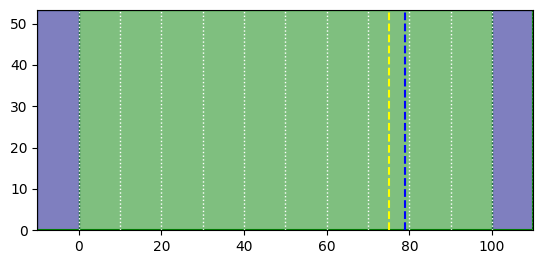

In [71]:
animation = create_play_animation(playId=80, gameId=2022090800, tracking_data=tracking_week_1)
display(animation)